<a href="https://colab.research.google.com/github/omazevych/my_first_repo/blob/main/HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [5]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

Saving yulu_rental.csv to yulu_rental.csv


In [6]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [7]:
df.shape

(10886, 19)

In [8]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


набір містить 10886 рядків та 19 стовпців. Ці дані за період 01.01.2011 - 19.12.2012 мають погодинний рівень деталізації, та містять інформації про кількість орендованих велосипедів, погоду, вологість, температуру та інше.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


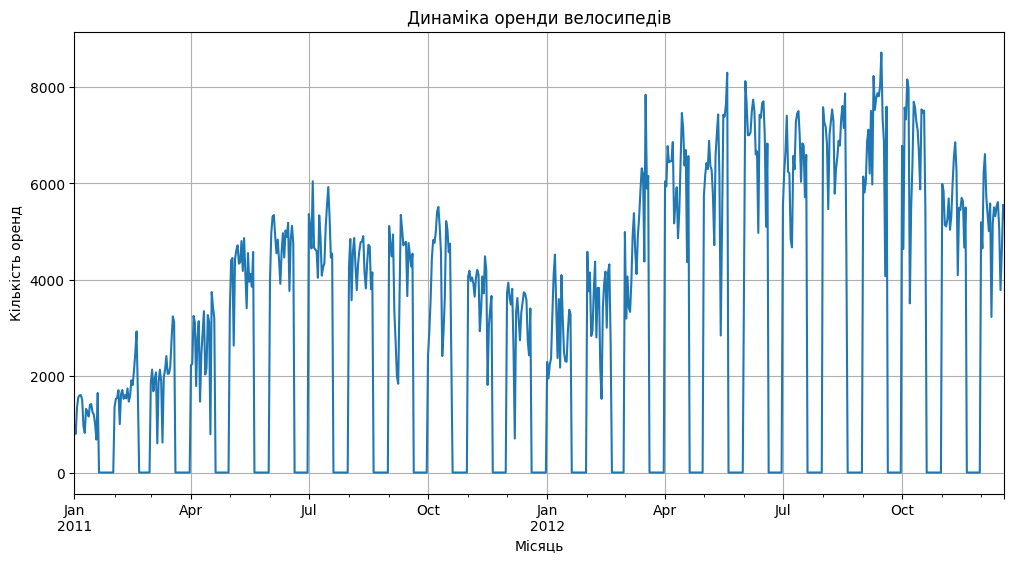

In [9]:
daily_counts = df['count'].resample('D').sum()

daily_counts.plot(
    figsize=(12,6),
    title='Динаміка оренди велосипедів',
    grid=True
)

plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.show()

1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
*Найбільш вірогідно, із-за недостатніх даних у другій половині кожного місяця, у нас утворються "заломи". Тобто може бути, що реєстратор не вносив дані, або ж технічні проблеми.  Заломи можна спробувати прибрати згладжуванням або ж дозаповнити пропущені дні (за умови, що дані все ж є, але просто не внесені в систему).*

2. Які загальні тенденції ви бачите на графіку?
*Позитивна динаміка - кількість оренд велосипедів зростає, і в 2012 році паомітно вищі показники ніж за той самий період 2011. Також можна відмітити сезонність оренди.*

3. Чи помітні якісь сезонні коливання?
*Так,  на графіку чітко видно сезонні коливання, наприклад у зимові місяці суттєво зменшений попит на ореду велосипедів*

4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?
*Найнижчим показником є січень 2011 - ймовірно із-за старту оренди та "не сезону" маємо такий показник, найвищі показники у вересні 2012. Є високі показники навесні та восени 2012 і ймовірно це зумовлене гарною погодою, або ж можливими проблемами з громадським транспортом - тож попит на велосипеди зростав.*


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

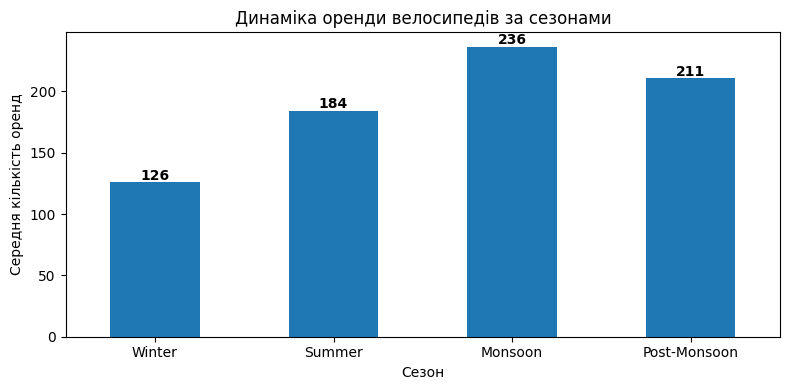

In [33]:

season_india = {12: 'Winter', 1: 'Winter', 2: 'Winter',
              3: 'Summer', 4: 'Summer', 5: 'Summer',
              6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon',
              10: 'Post-Monsoon', 11: 'Post-Monsoon'}

df["weather_season_india"] = df["month"].map(season_india)
df[["month", "weather_season_india"]].head()

rent_season = df.groupby("weather_season_india")["count"].mean()

order = ["Winter", "Summer", "Monsoon", "Post-Monsoon"]
rent_season = rent_season.reindex(order)

rent_season.plot.bar(
    figsize=(8, 4),
    title="Динаміка оренди велосипедів за сезонами",
    ylabel="Середня кількість оренд",
    xlabel="Сезон",
    grid= False

)
for i, v in enumerate(rent_season):
    plt.text(i, v + 2, f"{v:.0f}", ha="center", fontsize=10, fontweight="bold")

plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("rent_by_season.png", dpi=300)
plt.show()

1. В який квартал найбільша середня кількість оренди велосипедів?
*У квартал Moonsoon найбільша середня кількість оренди велосипедів.*

2. Як ви можете пояснити таку сезонну закономірність?
*Ймовірно у Moonsoon та Post-Moonsoon найбільш приємна погода для катання на велосипедах.*

3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?
*236/126= 1.87,  майже вдвічі*

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


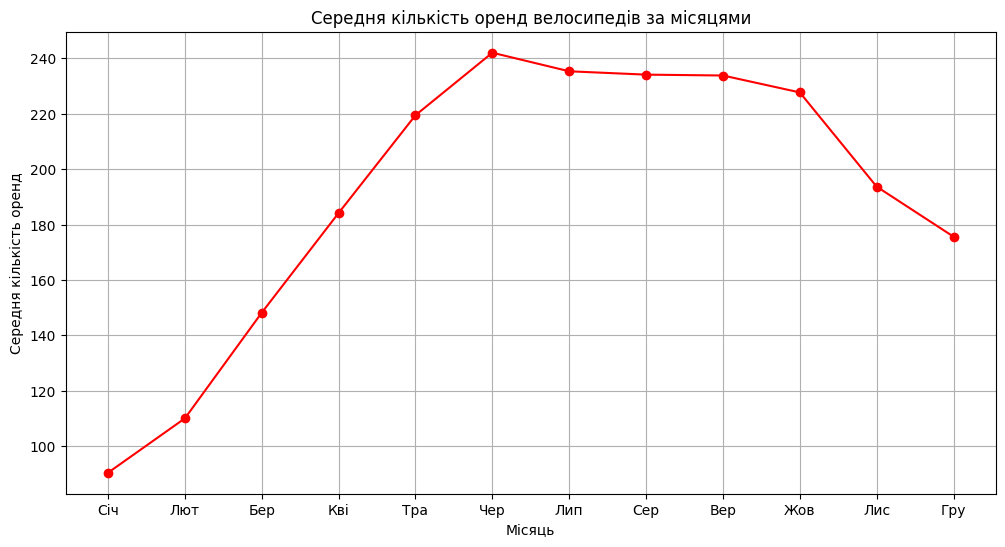

In [25]:
 #середня кількість оренд за місяць
monthly_avg = df.groupby('month')['count'].mean()

plt.figure(figsize=(12,6))

plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='red'
)

plt.title("Середня кількість оренд велосипедів за місяцями")
plt.xlabel("Місяць")
plt.ylabel("Середня кількість оренд")

# 12 поділок на осі X
month_names = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']
plt.xticks(range(1,13), labels=month_names)

plt.grid(True)

plt.show()

1. В які місяці спостерігається пік та спад оренди?
*Пік спостерігаєтся з червня по вересень, найкращий місяць червень, спад у зимові місяці грудень - лютий.*

2. Чи збігається ця закономірність з результатами з попереднього завдання?
*Так, найкращий сезон Moonsoon(червень-вересень), найгірший зима.*

3. Як може вплинути клімат на оренду велосипедів протягом року?
*Клімат відіграє одну з головних ролей в успіху бізнесу з оренди велосипедів.  Якщо в зимовий та осінній період низькі температури, опади, ожеледь - то переміщення на велосипеді не лише є незручним, а ще й небезпечним. У країнах, де клімат більш теплий - використання велосипеду є зручним протягом року.*

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

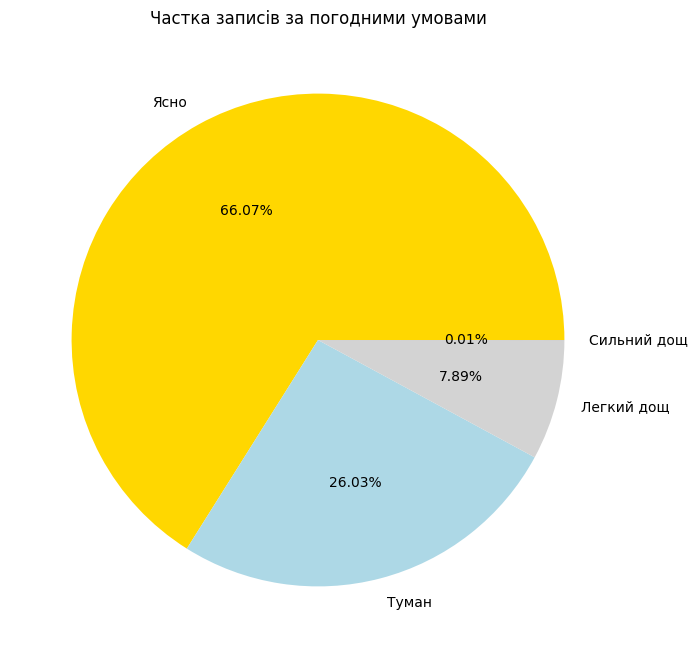

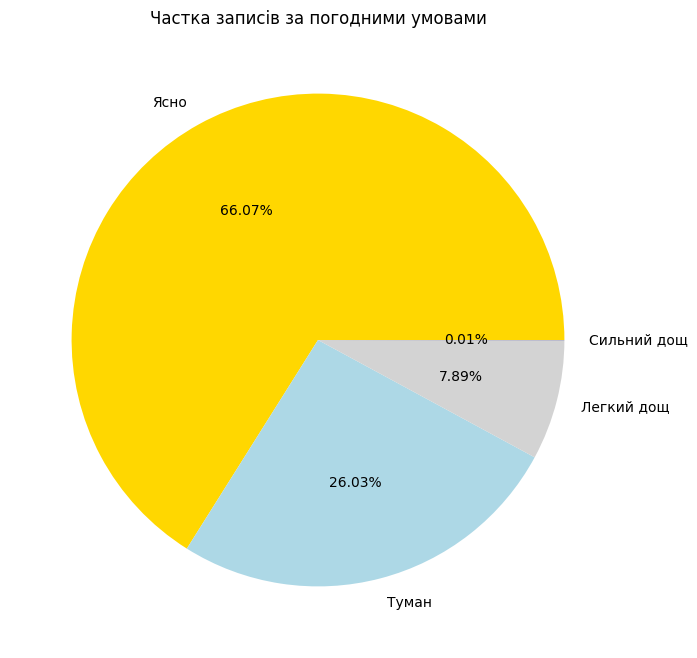

In [39]:
weather_counts = df['weather'].value_counts().sort_index()
weather_labels = [
    "Ясно",
    "Туман",
    "Легкий дощ",
    "Сильний дощ"
]

colors = [
    "gold",        # ясно
    "lightblue",   # туман
    "lightgray",   # легкий дощ
    "darkblue"     # сильний дощ
]

plt.figure(figsize=(12,8))

plt.pie(
    weather_counts,
    labels=weather_labels,
    autopct='%1.2f%%',
    colors=colors,
)

plt.title("Частка записів за погодними умовами")
plt.show()

1. Яка погода переважає в датасеті?
*Ясна погода переважає в датасеті.*

2. Чи є дні із сильним дощем? Яка їх частка?
*Частка днів з сильним дощем становить 0.01%*

3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?
*Погодні умови мають високий вплив на попит на оренду велосипедів, адже, сприятливі погодні умови, без опадів та туману - це перш за все комфорт катання та безпека.*

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

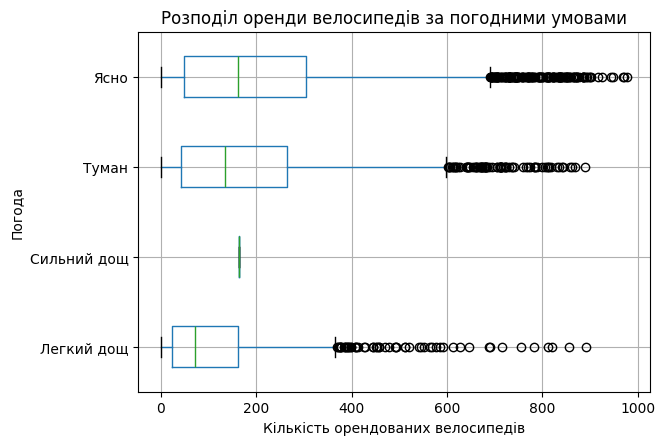

In [42]:
weather_type = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}

df['weather_type'] = df['weather'].map(weather_type)

df.boxplot(
    column='count',
    by='weather_type',
    vert=False
)

plt.title('Розподіл оренди велосипедів за погодними умовами')
plt.xlabel('Кількість орендованих велосипедів')
plt.ylabel('Погода')
plt.suptitle('')

plt.show()

1. При якій погоді найбільший розкид у кількості оренди?
*найбільший розкид при ясній погоді.*

2. Чи є викиди (outliers) в даних? При якій погоді?
*так, є викиди майже у будь-яку погоду, але найбільше в ясну та туманну.*

3. При якій погоді медіанне значення оренди найвище?
*При погоді ясно. Сильний дощ не можемо брати до уваги із-за неостанбої кількості даних для аналізу.*


## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

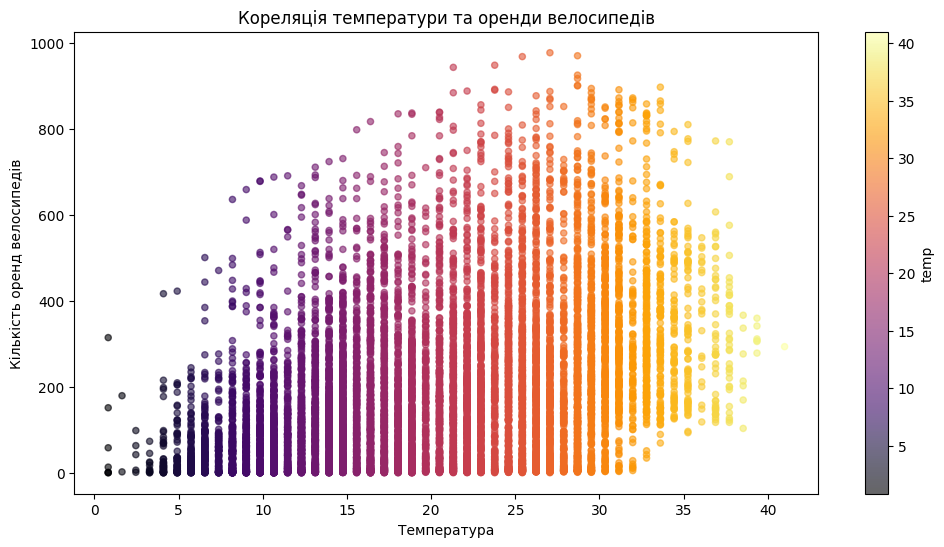

In [43]:
df.plot.scatter(
    x='temp',
    y='count',
    c='temp',
    colormap='inferno',
    alpha=0.6,
    figsize=(12,6),
    title='Кореляція температури та оренди велосипедів'
)

plt.xlabel('Температура')
plt.ylabel('Кількість оренд велосипедів')
plt.show()

 Чи є зв'язок між температурою та кількістю оренди? Який?

*З графіка бачимо, що існує позитивний лінійний зв'язок між показниками температури та кількості оренд велосипедів. Чим комфортніша температура - тим більше оренд, найвищі показники оренд при темпеатурі в діапазоні 20-30 С.*

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

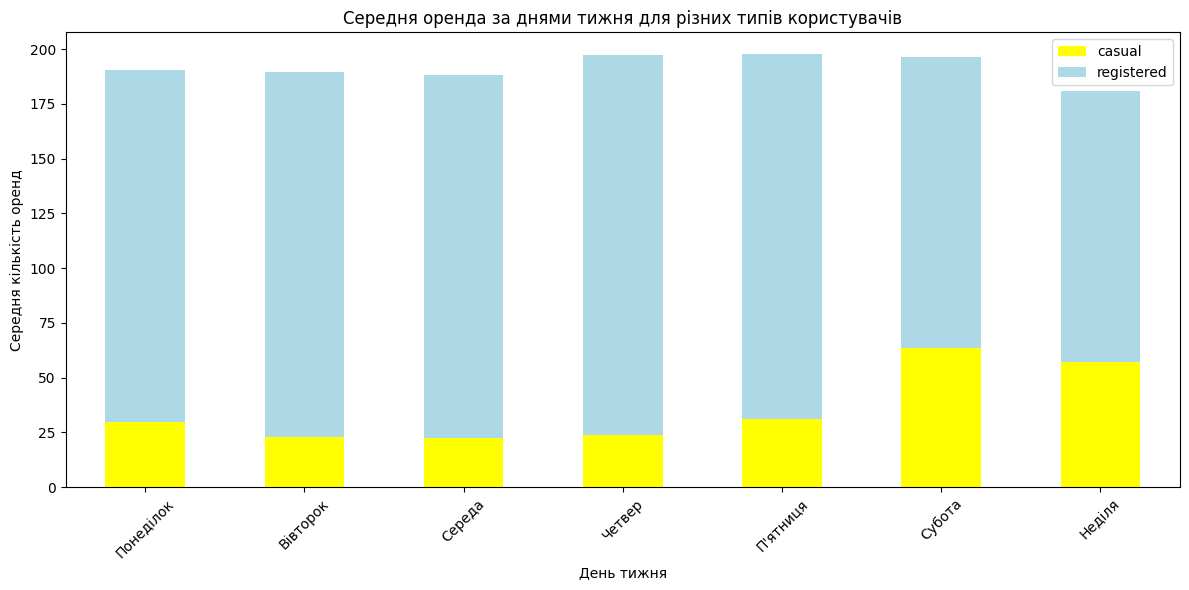

In [66]:
user_by_day = df.groupby('weekday_num')[['casual', 'registered']].mean()
days_order = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', "П'ятниця", 'Субота', 'Неділя']
user_by_day.index=days_order

user_by_day.plot(
    kind="bar",
    stacked=True,
    figsize=[12,6],
    title="Середня оренда за днями тижня для різних типів користувачів",
    ylabel="Середня кількість оренд",
    xlabel="День тижня",
    color=["yellow","lightblue"]
)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

1. В які дні тижня більше оренд від зареєстрованих користувачів?
*У будні дні більше оренд від зареєстрованих користувачів.*

2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?
*Ймовірно зареєстровані користувачі користуються велосипедами як транспортом, щоб дібратися на роботу, а у вихідні чимало незареєстрованих користувачів, які вирішили взяти велосипед для прогулянок. Ще варіант: у будні великий попит на оренду, тож потрібно бронювати велосипед і для бронювання потрібно бути зареєстрованим користувачем.*